In [2]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

In [3]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(f"So you said you were researching Panthera?", name="model")]
messages.append(HumanMessage(f"Yes, I know about Tigers. But what others should I learn about?", name="Daksh"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: model

So you said you were researching Panthera?
================================ Human Message =================================
Name: Daksh

Yes, I know about Tigers. But what others should I learn about?


In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4.1-mini")
llm.invoke(messages)

AIMessage(content='Great! Besides tigers, the Panthera genus includes several other fascinating big cats you might want to learn about:\n\n1. **Lion (Panthera leo):** Known as the "king of the jungle," lions are social cats living in prides, mostly found in Africa and a small population in India.\n\n2. **Leopard (Panthera pardus):** Highly adaptable and widespread across Africa and parts of Asia, leopards are solitary and excellent climbers.\n\n3. **Jaguar (Panthera onca):** Native to the Americas, jaguars are powerful swimmers and have the strongest bite relative to body size among big cats.\n\n4. **Snow Leopard (Panthera uncia):** Found in the mountain ranges of Central and South Asia, snow leopards are elusive and well adapted to cold, rugged terrain.\n\nEach of these species has unique behaviors, habitats, and conservation statuses. Would you like information on a specific one?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 195, 'prom

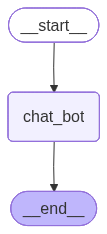

In [5]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

def chat_bot_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

builder = StateGraph(MessagesState)
builder.add_node("chat_bot", chat_bot_node)
builder.add_edge(START, "chat_bot")
builder.add_edge("chat_bot", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: model

So you said you were researching Panthera?
================================ Human Message =================================
Name: Daksh

Yes, I know about Tigers. But what others should I learn about?
================================== Ai Message ==================================

Great! Besides tigers, the genus *Panthera* includes several other magnificent big cats worth learning about:

1. **Lion (*Panthera leo*)** – Known as the 'King of the Jungle,' lions are unique for their social behavior, living in prides.

2. **Leopard (*Panthera pardus*)** – Highly adaptable and widespread, leopards are known for their spotted coats and climbing ability.

3. **Jaguar (*Panthera onca*)** – Native to the Americas, jaguars have the most powerful bite among big cats and are excellent swimmers.

4. **Snow Leopard (*Panthera uncia*)** – Found in the mountain ranges of Central and South Asia, snow leopard

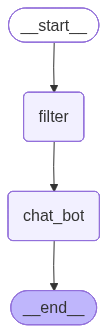

In [8]:
from langchain_core.messages import RemoveMessage

def filter_messages(state: MessagesState):
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-1]]
    return {"messages": delete_messages}

def chat_bot_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_bot", chat_bot_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_bot")
builder.add_edge("chat_bot", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
messages = [AIMessage("Hi.", name="model", id="1")]
messages.append(HumanMessage("Hi.", name="Daksh", id="2"))
messages.append(AIMessage("So you said you were researching Panthera?", name="model", id="3"))
messages.append(HumanMessage("Yes, I know about Tigers. But what others should I learn about?", name="Daksh", id="4"))

output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================ Human Message =================================
Name: Daksh

Yes, I know about Tigers. But what others should I learn about?
================================== Ai Message ==================================

That's great that you know about tigers! There are many fascinating animals and topics you can explore next. Here are some suggestions:

1. **Other Big Cats**: Learn about lions, leopards, jaguars, and snow leopards. They share similarities with tigers but have unique traits and habitats.

2. **Endangered Species**: Discover animals that are at risk of extinction, such as the Amur leopard, orangutans, or sea turtles, and learn about conservation efforts.

3. **Marine Life**: Explore creatures of the oceans like dolphins, sharks, octopuses, and coral reefs.

4. **Birds of Prey**: Study majestic birds like eagles, hawks, and owls.

5. **Insects and Pollinators**: Understand the role of bees, butterflies, and other insects in ecosystems.

6. **Ecosystem

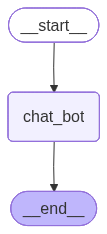

In [11]:
def chat_bot_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

builder = StateGraph(MessagesState)
builder.add_node("chat_bot", chat_bot_node)
builder.add_edge(START, "chat_bot")
builder.add_edge("chat_bot", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Snow Leopards!", name="Daksh"))

In [13]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: model

Hi.
================================ Human Message =================================
Name: Daksh

Hi.
================================== Ai Message ==================================
Name: model

So you said you were researching Panthera?
================================ Human Message =================================
Name: Daksh

Yes, I know about Tigers. But what others should I learn about?
================================== Ai Message ==================================

That's great that you know about tigers! There are many fascinating animals and topics you can explore next. Here are some suggestions:

1. **Other Big Cats**: Learn about lions, leopards, jaguars, and snow leopards. They share similarities with tigers but have unique traits and habitats.

2. **Endangered Species**: Discover animals that are at risk of extinction, such as the Amur leopard, orangutans, or sea turtles, and le

In [14]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: model

Hi.
================================ Human Message =================================
Name: Daksh

Hi.
================================== Ai Message ==================================
Name: model

So you said you were researching Panthera?
================================ Human Message =================================
Name: Daksh

Yes, I know about Tigers. But what others should I learn about?
================================== Ai Message ==================================

That's great that you know about tigers! There are many fascinating animals and topics you can explore next. Here are some suggestions:

1. **Other Big Cats**: Learn about lions, leopards, jaguars, and snow leopards. They share similarities with tigers but have unique traits and habitats.

2. **Endangered Species**: Discover animals that are at risk of extinction, such as the Amur leopard, orangutans, or sea turtles, and le

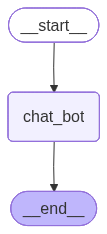

In [15]:
from langchain_core.messages import trim_messages

def chat_bot_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4.1-mini"),
            allow_partial=False,
        )
    
    return {"messages": [llm.invoke(messages)]}

builder = StateGraph(MessagesState)
builder.add_node("chat_bot", chat_bot_node)
builder.add_edge(START, "chat_bot")
builder.add_edge("chat_bot", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Jaguars live!", name="Daksh"))

In [17]:
trim_messages(
            messages,
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4.1-mini"),
            allow_partial=False
        )

[HumanMessage(content='Tell me where Jaguars live!', additional_kwargs={}, response_metadata={}, name='Daksh')]

In [18]:
messages_out_trim = graph.invoke({'messages': messages})